In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data1= pd.read_csv("C:/Users/BMT NETWORKS/OneDrive/Documents/Elevo Internship/Task2/train.csv")

In [4]:
Cleaned_Data = Data1.copy(deep=False)

In [11]:
Cleaned_Data["Ticket"]=Cleaned_Data["Ticket"].str.replace(r"[a-zA-Z/.\s]","", regex=True)

In [ ]:
Cleaned_Data["Ticket"]= Cleaned_Data["Ticket"].str[-6:]
Cleaned_Data.info()

In [5]:
#1.Which gender had a better chance of survival?
Pivot1= Cleaned_Data.pivot_table(values="Survived", columns="Sex", aggfunc="count")
Pivot1

Sex,female,male
Survived,314,577


In [ ]:
font1={"font":"serif", "color":"Blue", "size":20}
font2={"font":"serif", "color":"darkred", "size":15}

Pivot1.plot(kind="bar")
plt.title("Survival by Gender", fontdict=font1)
plt.xlabel("Survived (0=No, 1=Yes)", fontdict=font2)
plt.ylabel("Passengers", fontdict=font2)
plt.show()

In [19]:
pivot2=Cleaned_Data.pivot_table(values="Survived", columns="Pclass", aggfunc="count")
pivot2

Pclass,1,2,3
Survived,216,184,491


In [ ]:
font1={"font":"serif", "color":"Blue", "size":20}
font2={"font":"serif", "color":"darkred", "size":15}
pivot2.plot(kind="bar")
plt.title("Survival by Class", fontdict=font1)
plt.xlabel("Survived (0=No, 1=Yes)", fontdict=font2)
plt.ylabel("Passengers", fontdict=font2)
plt.grid(axis="y")
plt.show()

In [6]:
# how many rows of age column is missing
Missing_Age =Cleaned_Data[(Cleaned_Data["Age"]).isna()]
len(Missing_Age)

177

In [ ]:
#median_age= Cleaned_Data["Age"].median()
#Cleaned_Data["Age"].fillna(median_age, inplace=True)
Cleaned_Data.fillna({"Age":"median_age"}, inplace=True)

In [13]:
#New column
bins=[0,12,18,35,60,100]
labels=['Children', 'Teenagers', 'Young Adults', 'Adults', 'Old']

Cleaned_Data["Age_Group"]= pd.cut(Cleaned_Data["Age"], bins=bins, labels=labels)

In [ ]:
Cleaned_Data.head(5)

In [23]:
Cleaned_Data["Age"] = pd.to_numeric(
    Cleaned_Data["Age"],
    errors="coerce"
)

In [ ]:
Cleaned_Data.head(5)

In [17]:
pivot3=Cleaned_Data.pivot_table(values="Survived", columns="Age_Group", aggfunc="count")
pivot3

Age_Group,Children,Teenagers,Young Adults,Adults,Old
Survived,69,70,358,195,22


In [ ]:
pivot3.plot(kind="bar")
font1={"font":"serif", "color":"Blue", "size":20}
font2={"font":"serif", "color":"darkred", "size":15}

plt.title("Survival by Age_Group", fontdict=font1)
plt.xlabel("Survived (0=No, 1=Yes)", fontdict=font2)
plt.ylabel("Passengers", fontdict=font2)
plt.grid(axis="y")
plt.show()

In [26]:
mode_age= Cleaned_Data["Age"].mean()
mode_age

np.float64(29.69911764705882)

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

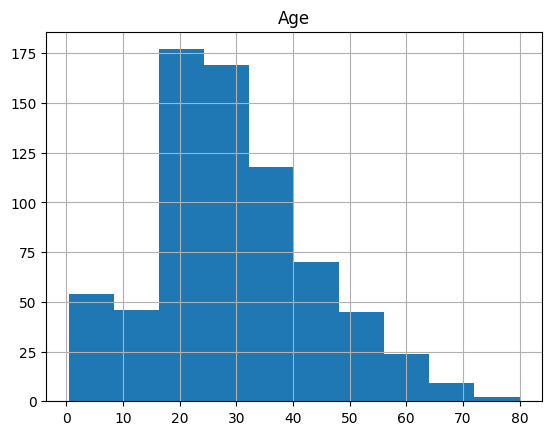

In [30]:
Cleaned_Data.hist(column="Age")

In [ ]:
plt.hist(Cleaned_Data.Age)
plt.axvline(Cleaned_Data.Age.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Ages of Passengers on Titanic')
plt.ylabel('Count')
plt.xlabel('Age (in Years)')
plt.show()

<Axes: >

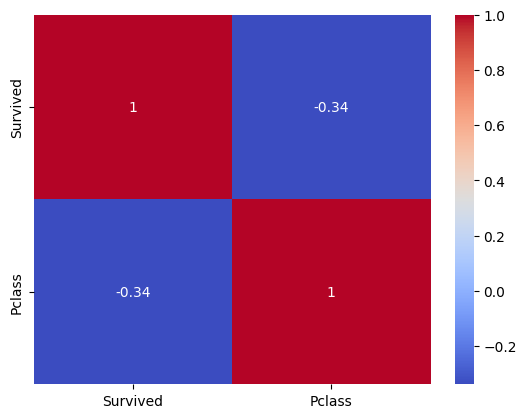

In [35]:
#Correlation


Corr1= Cleaned_Data[["Survived", "Pclass"]].corr()
sns.heatmap(Corr1, annot=True, cmap="coolwarm")

In [36]:
Sex_Data = Cleaned_Data.copy(deep=False)

In [46]:
Gender= {"male":0, "female":1}
Sex_Data["Sex_Numeric"]= Sex_Data["Sex"].map(Gender)

<Axes: >

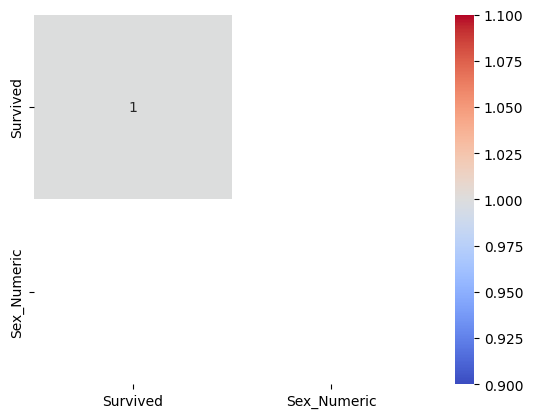

In [47]:
Corr2= Sex_Data[["Survived", "Sex_Numeric"]].corr()
sns.heatmap(Corr2, annot=True, cmap="coolwarm")

# Define the bin edges. Ages 0 to 80+ are covered.
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')] 

# Define the labels for the age groups
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

import pandas as pd

# Assuming your DataFrame is named 'titanic_df'
titanic_df['age_group'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels, right=False)
